In [757]:
import yfinance as yf
import pandas as pd 
import sklearn.model_selection as sk
import numpy as np
from ignite.engine import Engine, Events
from ignite.handlers import EarlyStopping
from prophet import Prophet
import matplotlib.pyplot as plt 
from copy import deepcopy as dc



In [758]:
data = yf.download(' aapl ',period="5y",interval="1D")
data=data.rename({"High":"high","Low":"low","Close":"close","Open":"open","Adj Close":"adj close","Volume":"volume"},axis=1)
data=pd.DataFrame(data["close"])

data

[*********************100%%**********************]  1 of 1 completed


,close
Date,
2018-09-24,55.197498
2018-09-25,55.547501
2018-09-26,55.105000
2018-09-27,56.237499
2018-09-28,56.435001
...,...
2023-09-18,177.970001
2023-09-19,179.070007
2023-09-20,175.490005


In [759]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
"""scalar=MinMaxScaler(feature_range=(-1,1))"""
scalar=StandardScaler()
df1=pd.DataFrame(scalar.fit_transform(data),columns=["y"],index=data.index.tolist())
df1.index.rename("ds",inplace=True)
df1.reset_index(inplace=True)

In [760]:
df1

,ds,y
0,2018-09-24,-1.289590
1,2018-09-25,-1.282136
2,2018-09-26,-1.291560
3,2018-09-27,-1.267441
4,2018-09-28,-1.263235
...,...,...
1253,2023-09-18,1.325099
1254,2023-09-19,1.348526
1255,2023-09-20,1.272282
1256,2023-09-21,1.239059


In [761]:
data["ds"]=data.index
data=data.rename({"close":"y"},axis=1)

In [762]:
split_index=int(len(df1)*0.99)

In [763]:
train=df1.iloc[:split_index,:]
test=df1.iloc[split_index:,:]

In [764]:
test


,ds,y
1245,2023-09-06,1.430306
1246,2023-09-07,1.316367
1247,2023-09-08,1.329571
1248,2023-09-11,1.354702
1249,2023-09-12,1.289533
1250,2023-09-13,1.245022
1251,2023-09-14,1.277606
1252,2023-09-15,1.262059
1253,2023-09-18,1.325099
1254,2023-09-19,1.348526


In [765]:
pd.DataFrame(test.ds,columns=["ds"])

,ds
1245,2023-09-06
1246,2023-09-07
1247,2023-09-08
1248,2023-09-11
1249,2023-09-12
1250,2023-09-13
1251,2023-09-14
1252,2023-09-15
1253,2023-09-18
1254,2023-09-19


23:50:26 - cmdstanpy - INFO - Chain [1] start processing
23:50:26 - cmdstanpy - INFO - Chain [1] done processing


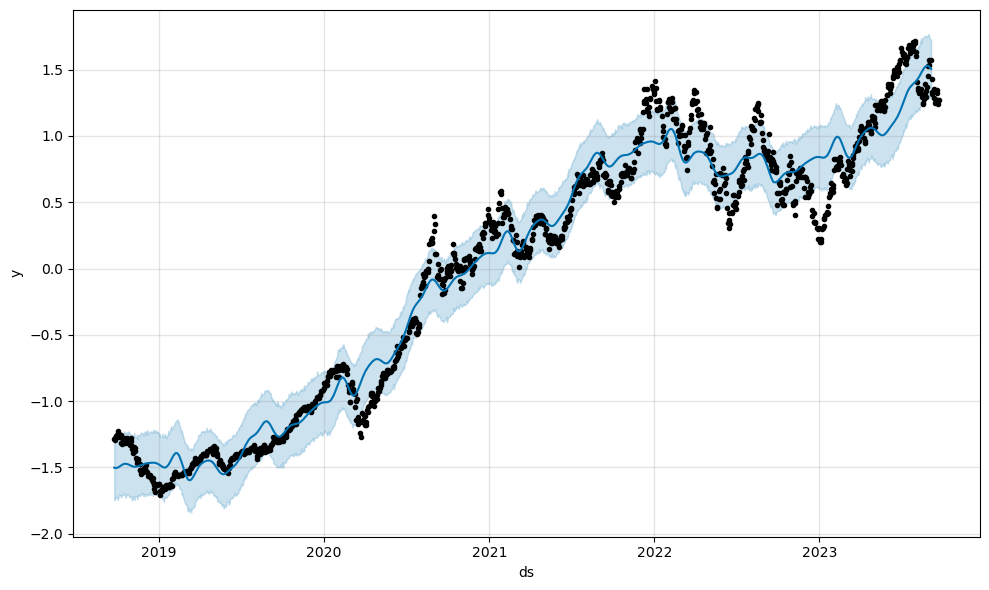

In [766]:
model = Prophet(weekly_seasonality=False,daily_seasonality=True)                                                               #creating an instant of prophet class in model.
model.fit(df1)                                                           #fitting data_frame to the model.
forecast = model.predict(pd.DataFrame(test.ds,columns=["ds"]))                                                #using predict function of python, predicting the values for future data values and storing it in forecast.
forecast2=model.predict(pd.DataFrame(train.ds,columns=["ds"]))
model.plot(forecast2)                                                            #plotting the values in forecast using atplotlib.
plt.show()  

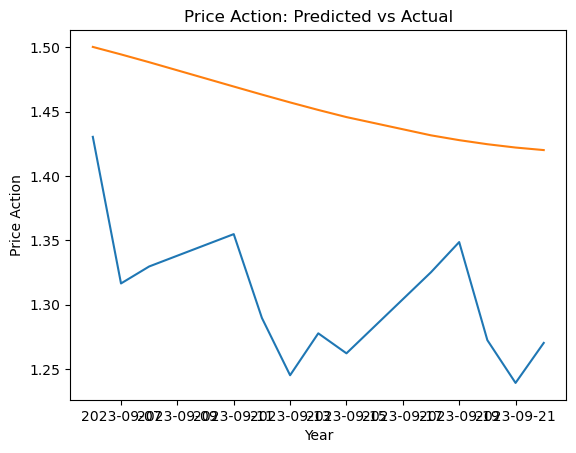

In [767]:
plt.plot(test['ds'], test["y"])
plt.plot(forecast['ds'], forecast["yhat"])
plt.xlabel("Year")
plt.ylabel("Price Action")
plt.title("Price Action: Predicted vs Actual")
plt.show()

In [768]:
forecast1=pd.concat([forecast2,forecast])
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-24,-1.324278,-1.749354,-1.272146,-1.324278,-1.324278,-0.178372,-0.178372,-0.178372,-0.190237,-0.190237,-0.190237,0.011865,0.011865,0.011865,0.0,0.0,0.0,-1.502650
1,2018-09-25,-1.323866,-1.734503,-1.265231,-1.323866,-1.323866,-0.180467,-0.180467,-0.180467,-0.190237,-0.190237,-0.190237,0.009770,0.009770,0.009770,0.0,0.0,0.0,-1.504333
2,2018-09-26,-1.323453,-1.741577,-1.273153,-1.323453,-1.323453,-0.181980,-0.181980,-0.181980,-0.190237,-0.190237,-0.190237,0.008256,0.008256,0.008256,0.0,0.0,0.0,-1.505433
3,2018-09-27,-1.323041,-1.727047,-1.255816,-1.323041,-1.323041,-0.182938,-0.182938,-0.182938,-0.190237,-0.190237,-0.190237,0.007298,0.007298,0.007298,0.0,0.0,0.0,-1.505979
4,2018-09-28,-1.322628,-1.731271,-1.271936,-1.322628,-1.322628,-0.183375,-0.183375,-0.183375,-0.190237,-0.190237,-0.190237,0.006862,0.006862,0.006862,0.0,0.0,0.0,-1.506003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,2023-09-18,1.583052,1.212190,1.664342,1.583052,1.583052,-0.151574,-0.151574,-0.151574,-0.190237,-0.190237,-0.190237,0.038663,0.038663,0.038663,0.0,0.0,0.0,1.431478
9,2023-09-19,1.585155,1.189277,1.665506,1.585155,1.585155,-0.157409,-0.157409,-0.157409,-0.190237,-0.190237,-0.190237,0.032828,0.032828,0.032828,0.0,0.0,0.0,1.427746
10,2023-09-20,1.587258,1.175024,1.650901,1.587258,1.587258,-0.162682,-0.162682,-0.162682,-0.190237,-0.190237,-0.190237,0.027555,0.027555,0.027555,0.0,0.0,0.0,1.424576
11,2023-09-21,1.589360,1.182347,1.639518,1.589360,1.589360,-0.167366,-0.167366,-0.167366,-0.190237,-0.190237,-0.190237,0.022871,0.022871,0.022871,0.0,0.0,0.0,1.421995


In [769]:
forecast1.reset_index(inplace=True)

In [770]:
forecast1.tail()

,index,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1253,8,2023-09-18,1.583052,1.212190,1.664342,1.583052,1.583052,-0.151574,-0.151574,-0.151574,-0.190237,-0.190237,-0.190237,0.038663,0.038663,0.038663,0.0,0.0,0.0,1.431478
1254,9,2023-09-19,1.585155,1.189277,1.665506,1.585155,1.585155,-0.157409,-0.157409,-0.157409,-0.190237,-0.190237,-0.190237,0.032828,0.032828,0.032828,0.0,0.0,0.0,1.427746
1255,10,2023-09-20,1.587258,1.175024,1.650901,1.587258,1.587258,-0.162682,-0.162682,-0.162682,-0.190237,-0.190237,-0.190237,0.027555,0.027555,0.027555,0.0,0.0,0.0,1.424576
1256,11,2023-09-21,1.589360,1.182347,1.639518,1.589360,1.589360,-0.167366,-0.167366,-0.167366,-0.190237,-0.190237,-0.190237,0.022871,0.022871,0.022871,0.0,0.0,0.0,1.421995
1257,12,2023-09-22,1.591463,1.189576,1.653550,1.591463,1.591463,-0.171443,-0.171443,-0.171443,-0.190237,-0.190237,-0.190237,0.018793,0.018793,0.018793,0.0,0.0,0.0,1.420020


In [771]:
param=forecast1.drop(["yhat_lower","yhat_upper","yhat","ds","index"],axis=1)

In [772]:
param

,trend,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper
0,-1.324278,-1.324278,-1.324278,-0.178372,-0.178372,-0.178372,-0.190237,-0.190237,-0.190237,0.011865,0.011865,0.011865,0.0,0.0,0.0
1,-1.323866,-1.323866,-1.323866,-0.180467,-0.180467,-0.180467,-0.190237,-0.190237,-0.190237,0.009770,0.009770,0.009770,0.0,0.0,0.0
2,-1.323453,-1.323453,-1.323453,-0.181980,-0.181980,-0.181980,-0.190237,-0.190237,-0.190237,0.008256,0.008256,0.008256,0.0,0.0,0.0
3,-1.323041,-1.323041,-1.323041,-0.182938,-0.182938,-0.182938,-0.190237,-0.190237,-0.190237,0.007298,0.007298,0.007298,0.0,0.0,0.0
4,-1.322628,-1.322628,-1.322628,-0.183375,-0.183375,-0.183375,-0.190237,-0.190237,-0.190237,0.006862,0.006862,0.006862,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1.583052,1.583052,1.583052,-0.151574,-0.151574,-0.151574,-0.190237,-0.190237,-0.190237,0.038663,0.038663,0.038663,0.0,0.0,0.0
1254,1.585155,1.585155,1.585155,-0.157409,-0.157409,-0.157409,-0.190237,-0.190237,-0.190237,0.032828,0.032828,0.032828,0.0,0.0,0.0
1255,1.587258,1.587258,1.587258,-0.162682,-0.162682,-0.162682,-0.190237,-0.190237,-0.190237,0.027555,0.027555,0.027555,0.0,0.0,0.0
1256,1.589360,1.589360,1.589360,-0.167366,-0.167366,-0.167366,-0.190237,-0.190237,-0.190237,0.022871,0.022871,0.022871,0.0,0.0,0.0


In [773]:
df1=df1.drop(["ds"],axis=1)

In [774]:
df1

,y
0,-1.289590
1,-1.282136
2,-1.291560
3,-1.267441
4,-1.263235
...,...
1253,1.325099
1254,1.348526
1255,1.272282
1256,1.239059


In [775]:
data2=pd.concat([df1,param],axis=1)

In [776]:
data2.shape

(1258, 16)

In [777]:
shifted_df_as_np=np.array(data2)

In [778]:
shifted_df_as_np.shape

(1258, 16)

In [779]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [780]:
device= 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [781]:
x=shifted_df_as_np[:,1:]
y=shifted_df_as_np[:,0]
x.shape,y.shape

((1258, 15), (1258,))

In [782]:
split_index=int(len(x)*0.80)
split_index2=int(len(x)*0.90)

In [783]:
lookback=15

In [784]:
x_train=torch.tensor(x[:split_index].reshape((-1,lookback,1))).float()
x_val=torch.tensor(x[split_index:split_index2].reshape((-1,lookback,1))).float()
x_test=torch.tensor(x[split_index2:].reshape((-1,lookback,1))).float()
y_train=torch.tensor(y[:split_index].reshape((-1,1))).float()
y_val=torch.tensor(y[split_index:split_index2].reshape((-1,1))).float()
y_test=torch.tensor(y[split_index2:].reshape((-1,1))).float()
x_train.shape,x_val.shape,x_test.shape,y_train.shape,y_val.shape,y_test.shape

(torch.Size([1006, 15, 1]),
 torch.Size([126, 15, 1]),
 torch.Size([126, 15, 1]),
 torch.Size([1006, 1]),
 torch.Size([126, 1]),
 torch.Size([126, 1]))

In [785]:
from torch.utils.data import Dataset,DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,i):
        return self.x[i],self.y[i]
    

In [786]:
trainds=TimeSeriesDataset(x_train,y_train)
testds=TimeSeriesDataset(x_test,y_test)
valds=TimeSeriesDataset(x_val,y_val)

In [787]:
batch_size=16
train_loader=DataLoader(trainds,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(testds,batch_size=batch_size,shuffle=True)
val_loader=DataLoader(valds,batch_size=batch_size,shuffle=True)

In [788]:
import torch.nn as nn
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_lay):
        super().__init__()
        self.hidden_size=hidden_size
        self.num_lay=num_lay
        self.lstm=nn.LSTM(input_size,hidden_size,num_lay,batch_first=True)
        self.fc=nn.Linear(hidden_size,1)
    def forward(self,x):
        batch_size=x.size(0)
        h0=torch.zeros(self.num_lay,batch_size,self.hidden_size).to(device)
        c0=torch.zeros(self.num_lay,batch_size,self.hidden_size).to(device)
        out,_=self.lstm(x,(h0,c0))
        out=self.fc(out[:,-1,:])
        return out

In [789]:
model=LSTM(1,4,1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [790]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch*1}')
    running_loss=0.0
    for batch_index,batch in enumerate(train_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        output=model(x_batch)
        loss=loss_function(output,y_batch)
        running_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_index %100==99:
            avg_loss_across_batches=running_loss/100
            print('Batch {0},loss:{1:.3f}'.format(batch_index+1,avg_loss_across_batches))
            running_loss=0.0
    print()

In [791]:
def validate_one_epoch():
    model.train(False)
    running_lose=0.0
    for batch_index,batch in enumerate(val_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        with torch.no_grad():
            output=model(x_batch)
            loss=loss_function(output,y_batch)
            running_lose+=loss.item()
    avg_loss_across_batches=running_lose/len(test_loader)
    print('Val loss {0:.3f}'.format(avg_loss_across_batches))
    print('*************************************')
    print()

In [792]:
learning_rate=0.001
num_epochs=50
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 0

Val loss 1.154
*************************************

Epoch: 1

Val loss 0.964
*************************************

Epoch: 2

Val loss 0.845
*************************************

Epoch: 3

Val loss 0.784
*************************************

Epoch: 4

Val loss 0.770
*************************************

Epoch: 5

Val loss 0.773
*************************************

Epoch: 6

Val loss 0.757
*************************************

Epoch: 7

Val loss 0.755
*************************************

Epoch: 8

Val loss 0.763
*************************************

Epoch: 9

Val loss 0.748
*************************************

Epoch: 10

Val loss 0.760
*************************************

Epoch: 11

Val loss 0.762
*************************************

Epoch: 12

Val loss 0.766
*************************************

Epoch: 13

Val loss 0.754
*************************************

Epoch: 14

Val loss 0.748
*************************************

Epoch: 15

Val loss 0.764
*********

In [793]:
with torch.no_grad():
    predicted=model(x_train.to(device)).to('cpu').numpy()
    

In [794]:
torch.cuda.empty_cache()

In [795]:
import matplotlib.pyplot as plt

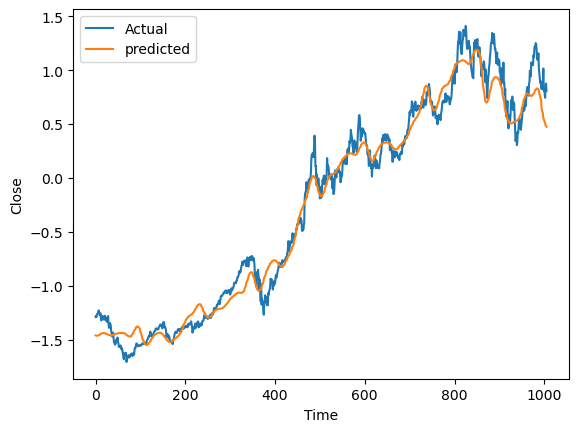

In [796]:
plt.plot(y_train,label="Actual")
plt.plot(predicted,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [797]:
train_prediction=predicted.flatten()
dummies=np.zeros((x_train.shape[0],lookback+1))
dummies[:,0]=train_prediction
dummies=scalar.inverse_transform(dummies)
train_prediction=dc(dummies[:,0])
train_prediction

array([ 47.11588064,  47.04540859,  46.99765104, ..., 138.63749496,
       138.33935731, 138.07494717])

In [798]:
dummies=np.zeros((x_train.shape[0],lookback+1))
dummies[:,0]=y_train.flatten()
dummies=scalar.inverse_transform(dummies)
new_y_train=dc(dummies[:,0])
new_y_train

array([ 55.19749713,  55.54750086,  55.10499906, ..., 154.47999612,
       156.8999947 , 153.72000064])

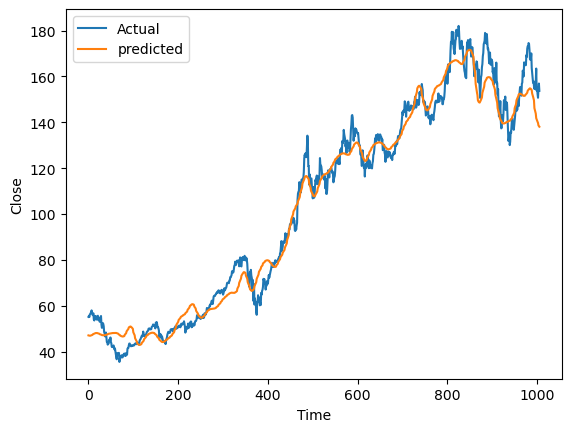

In [799]:
plt.plot(new_y_train,label="Actual")
plt.plot(train_prediction,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [800]:
test_prediction=model(x_test.to(device)).detach().cpu().numpy().flatten()
dummies=np.zeros((x_test.shape[0],lookback+1))
dummies[:,0]=test_prediction.flatten()
dummies=scalar.inverse_transform(dummies)
test_prediction=dc(dummies[:,0])
test_prediction

array([163.80721316, 165.85549824, 166.4187765 , 166.92642717,
       167.38237968, 167.79101124, 168.77788308, 169.04140042,
       169.27863208, 169.49290295, 170.17452836, 170.31135273,
       170.43764268, 170.5543106 , 170.6619498 , 170.93318045,
       171.00617696, 171.06996564, 171.12407072, 171.16794923,
       171.2319786 , 171.22863132, 171.21185013, 171.18104169,
       171.13566866, 170.90777357, 170.80037505, 170.67724207,
       170.53867688, 170.38529521, 169.84747981, 169.64823254,
       169.44311352, 169.23529653, 169.0284367 , 168.45473037,
       168.29352345, 168.15430336, 168.04066927, 167.95562702,
       167.88946501, 167.93158032, 168.00399469, 168.10439638,
       168.22975155, 168.90738597, 169.10170189, 169.2988949 ,
       169.49607111, 170.06512595, 170.24233042, 170.41195033,
       170.57376738, 170.72787672, 171.14931527, 171.27886295,
       171.40460435, 171.52762538, 171.64901195, 172.13715547,
       172.26341184, 172.39211989, 172.5233468 , 172.92

In [801]:
dummies=np.zeros((x_test.shape[0],lookback+1))
dummies[:,0]=y_test.flatten()
dummies=scalar.inverse_transform(dummies)
new_y_test=dc(dummies[:,0])
new_y_test

array([160.25000049, 158.27999872, 157.64999311, 160.77000477,
       162.3600004 , 164.89999458, 166.16999727, 165.63000446,
       163.75999296, 164.66000337, 162.02999919, 160.80000437,
       160.10000529, 165.55999699, 165.21000445, 165.22999299,
       166.46999888, 167.63000583, 166.64999648, 165.02000418,
       165.33000285, 163.77000682, 163.75999296, 168.41000104,
       169.67999254, 169.58999653, 168.53999092, 167.44999703,
       165.78999113, 173.57000514, 173.49999767, 171.7700067 ,
       173.55999688, 173.75000274, 172.57000725, 172.07000831,
       172.07000831, 172.69000006, 175.05000223, 175.16000357,
       174.19999955, 171.55999551, 171.83999738, 172.99000726,
       175.42999158, 177.30000308, 177.25000094, 180.08999673,
       180.94999648, 179.58000072, 179.21000844, 177.82000735,
       180.57000714, 180.96000474, 183.78999227, 183.30999866,
       183.94999574, 186.00999631, 184.91999682, 185.00999283,
       183.960004  , 187.00000272, 186.67999019, 185.27

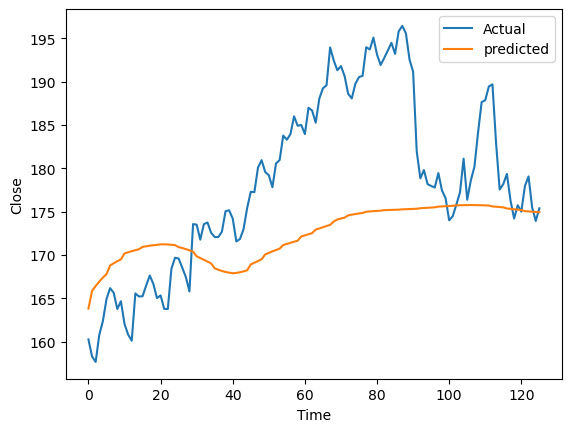

In [802]:
plt.plot(new_y_test,label="Actual")
plt.plot(test_prediction,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()